<a href="https://colab.research.google.com/github/MalekBEKRI97/ComponentEditor/blob/master/CNN_pyeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import os
import h5py
from sklearn import preprocessing
import pandas as pd
import sklearn
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sklearn
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')


Mounted at /content/drive


In [ ]:
#with h5py.File('C:\Users\malek\Desktop\pyEIT-master\thorax_simulations.h5', 'r') as hdf:
with h5py.File(r"thorax_simulations_10000.h5", 'r') as hdf:

  ls =  list(hdf.keys())
  print('List of datasets in the file: \n', ls)
  
  data0 = hdf.get('truth_data')
  data1 = hdf.get('voltage_0')

  truth_data = np.array(data0)
  voltage_0 = np.array(data1)

  print(voltage_0)
  print('Shape of voltage_0: \n', voltage_0.shape)

List of datasets in the file: 
 ['truth_data', 'voltage_0', 'voltage_3', 'voltage_5']
[[2.51523833e-05 8.50844709e-06 5.66533499e-06 ... 4.55601191e-06
  5.81882376e-06 1.18498192e-05]
 [1.19656933e-05 5.25965049e-06 4.19317838e-06 ... 2.03524225e-06
  2.44386850e-06 3.88117643e-06]
 [1.53357793e-05 7.44935076e-06 6.21673585e-06 ... 2.38829750e-06
  2.89765882e-06 4.29964225e-06]
 ...
 [1.08940216e-05 5.68698446e-06 5.25911377e-06 ... 1.76236585e-06
  2.00671576e-06 2.64993840e-06]
 [1.22847699e-05 5.85835446e-06 5.07191637e-06 ... 1.98524183e-06
  2.40907431e-06 3.61662795e-06]
 [1.23845803e-05 5.66327926e-06 4.65965492e-06 ... 1.98863145e-06
  2.44026795e-06 3.77579390e-06]]
Shape of voltage_0: 
 (10000, 208)


In [ ]:
#voltage_0
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(voltage_0.T)
voltage=minmax_scale.transform(voltage_0.T).T
#voltage_0=np.expand_dims(voltage, axis=2)
print(np.shape(voltage))

#truth_con
minmax_scale = preprocessing.MinMaxScaler().fit(truth_data.T)
cond=minmax_scale.transform(truth_data.T).T
#truth_data=np.expand_dims(cond, axis=2)
Output_layer=len(truth_data[1])

voltage_0=voltage
truth_data=cond

(10000, 208)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(voltage_0,truth_data,test_size=0.2, random_state=42)

In [ ]:
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (8000, 208)
shape of output - training set (8000, 2707)
shape of input - testing set (2000, 208)
shape of output - testing set (2000, 2707)


In [ ]:
sample_size = x_train.shape[0] # number of samples in train set
time_steps  = x_train.shape[1] # number of features in train set
input_dimension = 1           # each feature is represented by 1 number

x_train = x_train.reshape(sample_size,time_steps,input_dimension)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print("After reshape train data set shape:\n", x_train.shape)
print("After reshape test data set shape:\n", x_test.shape)
print("1 Sample shape:\n",x_train[0].shape)
#print("An example sample:\n", x_train[0])

After reshape train data set shape:
 (8000, 208, 1)
After reshape test data set shape:
 (2000, 208, 1)
1 Sample shape:
 (208, 1)


In [ ]:
def build_conv1D_model():
  n_timesteps = x_train.shape[1] #208
  n_features  = x_train.shape[2] #1 
  """model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=3, name="Conv1D_1",kernel_regularizer=tf.keras.regularizers.L1(0.00001),
    activity_regularizer=tf.keras.regularizers.L2(0.00001)))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.AveragePooling1D(pool_size=2, name="MaxPooling1D1",))

  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, name="Conv1D_2",kernel_regularizer=tf.keras.regularizers.L1(0.00001),
    activity_regularizer=tf.keras.regularizers.L2(0.00001)))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.AveragePooling1D(pool_size=2, name="MaxPooling1D2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=3, name="Conv1D_3",kernel_regularizer=tf.keras.regularizers.L1(0.00001),
    activity_regularizer=tf.keras.regularizers.L2(0.00001)))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.AveragePooling1D(pool_size=2, name="MaxPooling1D3"))

  model.add(keras.layers.Conv1D(filters=8, kernel_size=3, name="Conv1D_4",kernel_regularizer=tf.keras.regularizers.L1(0.00001),
    activity_regularizer=tf.keras.regularizers.L2(0.00001)))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.AveragePooling1D(pool_size=2, name="MaxPooling1D4"))

  model.add(keras.layers.Conv1D(filters=64, kernel_size=3, name="Conv1D_5",kernel_regularizer=tf.keras.regularizers.L1(0.00001),
    activity_regularizer=tf.keras.regularizers.L2(0.00001)))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.AveragePooling1D(pool_size=2, name="MaxPooling1D5",))

  model.add(keras.layers.Flatten())

  #it's always dense layer then dropout layer then dense layer then dropout, otherwise it doesn't make sense

  model.add(keras.layers.Dense(512, activation='relu', name="Dense_1")) 
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(1024, activation='relu', name="Dense_2")) 
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(2707, activation='linear', name="Dense_3"))
  #optimizer = tf.keras.optimizers.RMSprop(0.000001)
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000003), metrics=['mae'])
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae'])"""
  model = keras.Sequential(name="model_conv1D")

  model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(208,1)))
  model.add(keras.layers.MaxPooling1D(pool_size=2,padding='same'))
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu", ))
  model.add(keras.layers.MaxPooling1D(pool_size=2,padding='same'))
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu",))
  model.add(keras.layers.MaxPooling1D(pool_size=2,padding='same'))
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(512, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(1024, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(2048, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(4098, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(2707,'sigmoid'))

  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

  """xtrain, xtest, ytrain, ytest=train_test_split(vol, cond, test_size=0.2,random_state=42)

print(np.shape(xtrain))
INIT_LR = 1e-3
EPOCHS = 300
BATCH_SIZE=32
def step_decay(epoch):
	initial_lrate = INIT_LR
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

callbacks_list = [keras.callbacks.EarlyStopping(monitor='loss', patience=10),]"""
  
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 208, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 104, 64)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 104, 64)          256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 104, 32)           6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 52, 32)           0         
 1D)                                                             
                                                      

In [ ]:
# Store training stats
EPOCHS = 100
# fit network
history = model_conv1D.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, shuffle=True, verbose=1, batch_size=32)

Epoch 1/100
200/200 [==============================] - 12s 11ms/step - loss: 0.0469 - mae: 0.1497 - val_loss: 0.1388 - val_mae: 0.3327
Epoch 2/100
200/200 [==============================] - 2s 11ms/step - loss: 0.0407 - mae: 0.1382 - val_loss: 0.1390 - val_mae: 0.3229
Epoch 3/100
200/200 [==============================] - 2s 12ms/step - loss: 0.0399 - mae: 0.1359 - val_loss: 0.0446 - val_mae: 0.1536
Epoch 4/100
200/200 [==============================] - 2s 9ms/step - loss: 0.0393 - mae: 0.1347 - val_loss: 0.0338 - val_mae: 0.1311
Epoch 5/100
200/200 [==============================] - 2s 9ms/step - loss: 0.0379 - mae: 0.1307 - val_loss: 0.0403 - val_mae: 0.1403
Epoch 6/100
200/200 [==============================] - 2s 9ms/step - loss: 0.0363 - mae: 0.1282 - val_loss: 0.0306 - val_mae: 0.1188
Epoch 7/100
200/200 [==============================] - 2s 9ms/step - loss: 0.0354 - mae: 0.1262 - val_loss: 0.0410 - val_mae: 0.1422
Epoch 8/100
200/200 [==============================] - 2s 9ms/ste

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

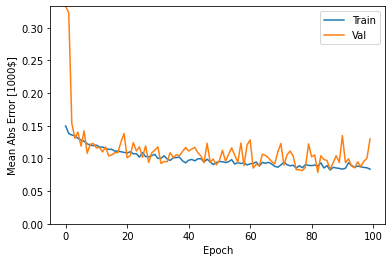

In [ ]:
from matplotlib.pyplot import *
plot_history(history)

In [ ]:
[loss, mae] = model_conv1D.evaluate(x_test, y_test, batch_size=32, verbose=0)
print("Testing set Mean Abs Error", mae)

Testing set Mean Abs Error 0.12606488168239594


In [ ]:
test_predictions = model_conv1D.predict(x_test) #why flatten here?


In [ ]:
print("test_predictions", test_predictions)

test_predictions [[2.1170337e-02 9.4583463e-03 9.4952341e-03 ... 9.4324704e-03
  9.6707325e-03 9.5296791e-03]
 [8.1624651e-01 8.1872916e-01 8.2305688e-01 ... 8.1555152e-01
  8.2326728e-01 8.1382358e-01]
 [7.3742598e-01 7.3757577e-01 7.4054444e-01 ... 7.3684049e-01
  7.4312800e-01 7.3457956e-01]
 ...
 [1.6162428e-01 1.6296732e-01 1.6700564e-01 ... 1.6410919e-01
  1.6626827e-01 1.6344449e-01]
 [6.9069979e-04 4.8496042e-04 4.7474002e-04 ... 4.8204607e-04
  4.7099206e-04 4.7111738e-04]
 [4.5365755e-02 4.3780282e-02 4.3999158e-02 ... 4.4350509e-02
  4.4134080e-02 4.3788269e-02]]


In [ ]:
#plot_prediction(y_test, test_predictions)

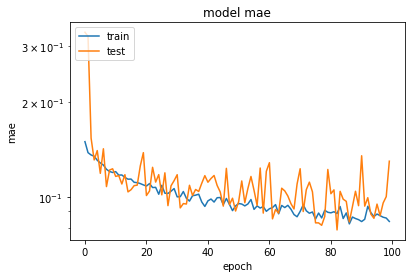

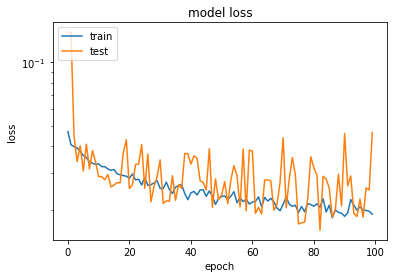

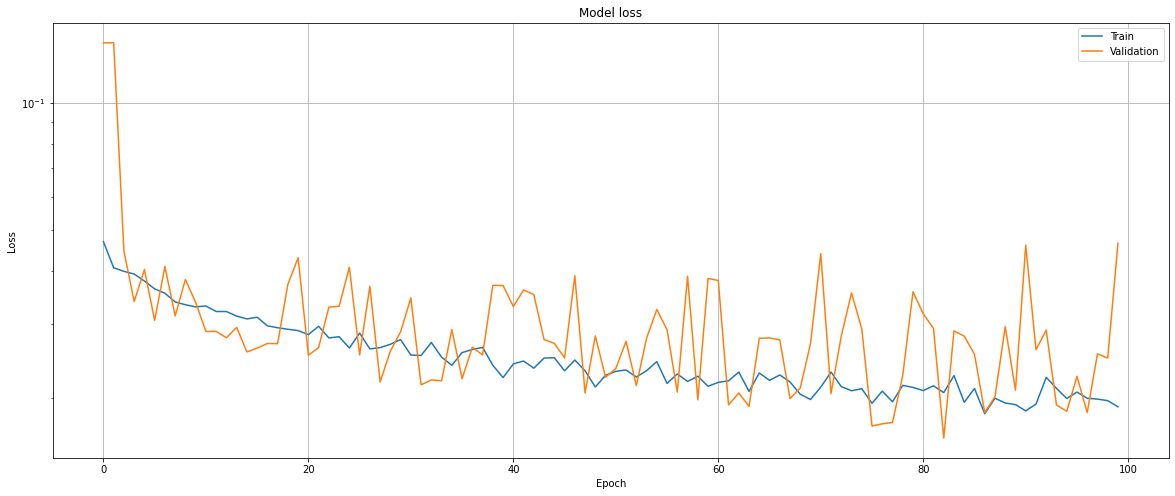

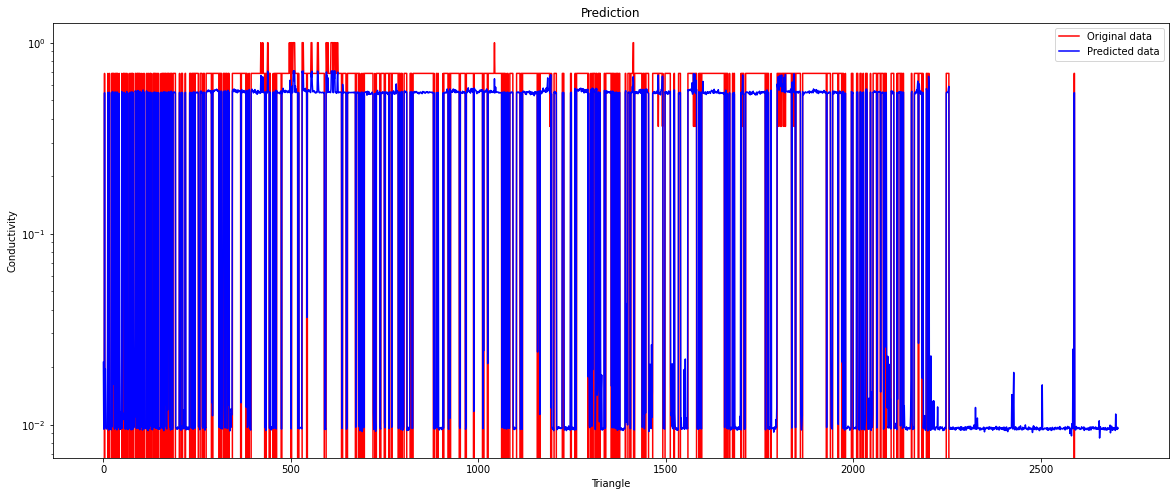

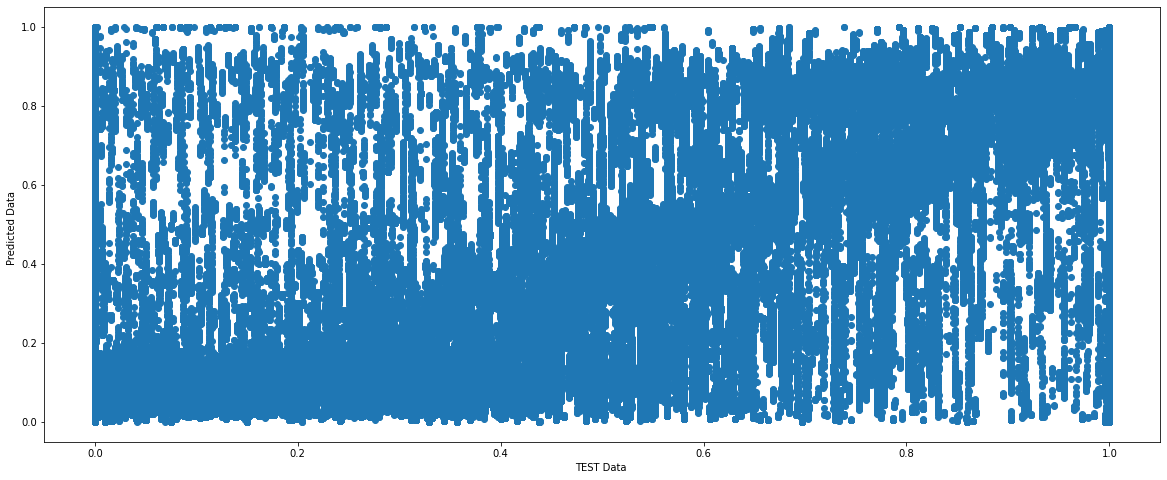

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.semilogy(history.history['mae'])
plt.semilogy(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


history_dict = history.history
history_dict.keys()
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
fig, ax2 = plt.subplots(figsize=(20, 8))
plt.semilogy(y_test[0], color = 'red', label = 'Original data')
plt.semilogy(test_predictions[0] , color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.ylabel('Conductivity')
plt.xlabel('Triangle')
plt.legend()
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.scatter(y_test, test_predictions )
plt.ylabel('Predicted Data  ')
plt.xlabel('TEST Data ')



plt.show()

In [ ]:
"""hf = h5py.File('prediction_data.h5', 'w')
hf.create_dataset('test_predictions', data=test_predictions)
hf.close()"""

with h5py.File('cnn.h5','w') as hf:
    hf.create_dataset('y_predicted', data=test_predictions)
    hf.create_dataset('x_test', data=x_test)
    hf.create_dataset('y_test', data=y_test)